Importing the dependacies

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics

Data Collection and Processing

In [8]:
#loading the data from csv file to a pandas dataframe
calories = pd.read_csv('calories.csv')
exercise_data = pd.read_csv('exercise.csv')

In [9]:
#print the first 5 rows of the dataframe
calories.head()

,User_ID,Calories
0,14733363,231.0
1,14861698,66.0
2,11179863,26.0
3,16180408,71.0
4,17771927,35.0


In [10]:
#print the first 5 rows of the dataframe
exercise_data.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8


Combining the two Dataframes

In [11]:
calories_data = pd.concat([exercise_data,calories['Calories']],axis=1)

In [12]:
calories_data.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8,35.0


In [13]:
calories_data.shape

(15000, 9)

In [14]:
#getting some more info about dataset
calories_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   User_ID     15000 non-null  int64  
 1   Gender      15000 non-null  object 
 2   Age         15000 non-null  int64  
 3   Height      15000 non-null  float64
 4   Weight      15000 non-null  float64
 5   Duration    15000 non-null  float64
 6   Heart_Rate  15000 non-null  float64
 7   Body_Temp   15000 non-null  float64
 8   Calories    15000 non-null  float64
dtypes: float64(6), int64(2), object(1)
memory usage: 1.0+ MB


In [28]:
#checking for missing values
calories_data.isnull().sum()

User_ID       0
Gender        0
Age           0
Height        0
Weight        0
Duration      0
Heart_Rate    0
Body_Temp     0
Calories      0
dtype: int64

Data Analysis

In [16]:
#get some statistical measures about data
calories_data.describe()

,User_ID,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
count,1.500000e+04,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,1.497736e+07,42.789800,174.465133,74.966867,15.530600,95.518533,40.025453,89.539533
std,2.872851e+06,16.980264,14.258114,15.035657,8.319203,9.583328,0.779230,62.456978
min,1.000116e+07,20.000000,123.000000,36.000000,1.000000,67.000000,37.100000,1.000000
25%,1.247419e+07,28.000000,164.000000,63.000000,8.000000,88.000000,39.600000,35.000000
50%,1.499728e+07,39.000000,175.000000,74.000000,16.000000,96.000000,40.200000,79.000000
75%,1.744928e+07,56.000000,185.000000,87.000000,23.000000,103.000000,40.600000,138.000000
max,1.999965e+07,79.000000,222.000000,132.000000,30.000000,128.000000,41.500000,314.000000


Data Visualization

In [17]:
sns.set()

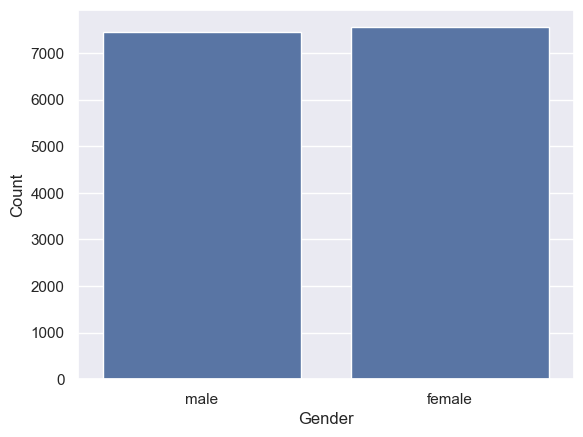

In [18]:
#plotting gender column in count plot
sns.countplot(data=calories_data, x='Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

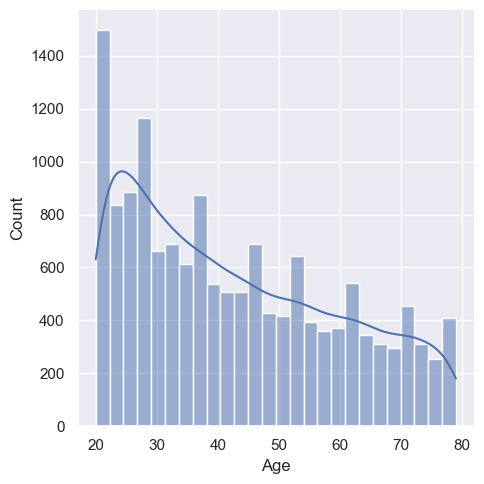

In [19]:
#finding distribution of age column
sns.displot(calories_data['Age'],kde=True)

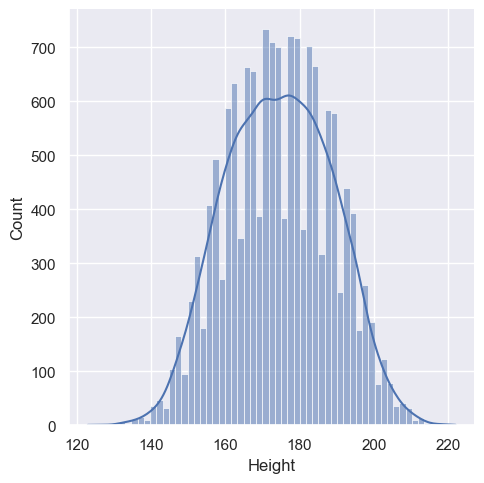

In [20]:
#finding distribution of height column
sns.displot(calories_data['Height'],kde=True)

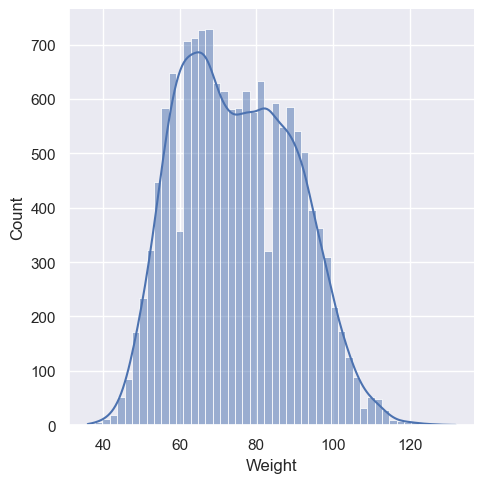

In [21]:
#finding distribution of weight column
sns.displot(calories_data['Weight'],kde=True)

In [32]:
#coreelation fnc dont take DATA WITH NON NUMERIC VALUES so we removed it 
non_numeric_columns = calories_data.select_dtypes(include=['object']).columns
calories_data_cleaned = calories_data.drop(columns=non_numeric_columns)
correlation = calories_data_cleaned.corr()

<Axes: >

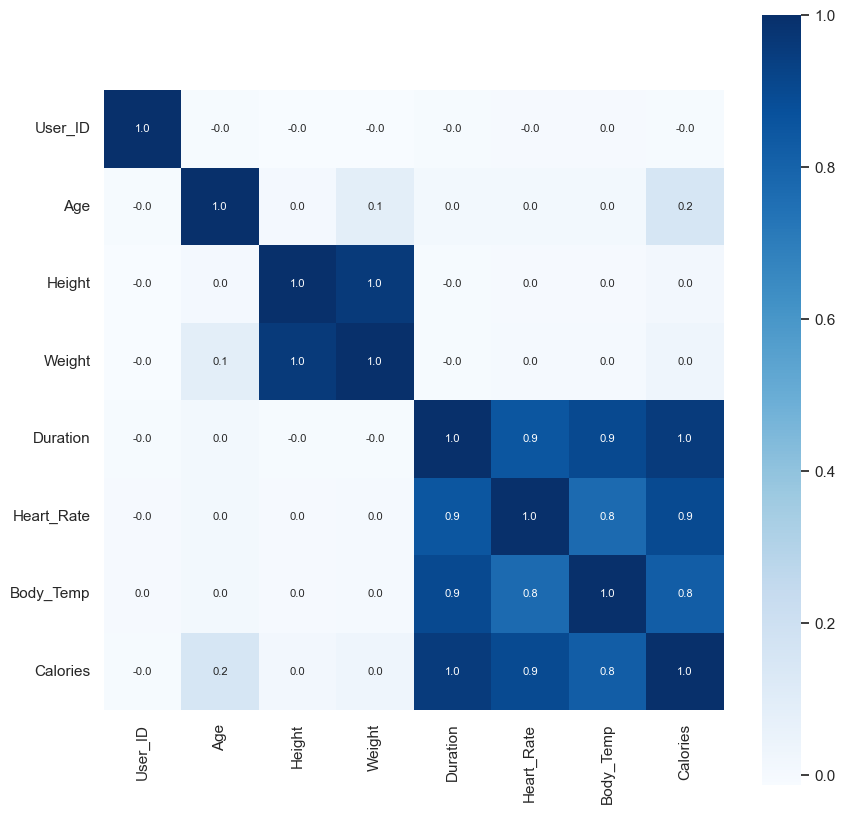

In [33]:
#Constructing a heatmap to understand the correlation 
plt.figure(figsize=(10,10))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size': 8}, cmap='Blues')

Converting the text data to numerical for machine learning model


In [39]:
calories_data.replace({"Gender": {'male': 0, 'female': 1}}, inplace=True)
#for permanent change we have used inplace function
calories_data.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,0,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,1,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,0,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,1,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,1,27,154.0,58.0,10.0,81.0,39.8,35.0


Separating features and target

In [47]:
X=calories_data.drop(columns=["User_ID","Calories"],axis=1)
Y=calories_data['Calories']

In [105]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y ,test_size=0.2,random_state=2)

Model Training

In [106]:
model=XGBRegressor()#loading model

In [107]:
model.fit(X_train,Y_train)#training model

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

Evaluation of the trained Model

In [108]:
test_data_prediction=model.predict(X_test)

In [109]:
print(test_data_prediction)

[125.58828  222.11377   38.725952 ... 144.3179    23.425894  90.100494]


In [110]:
#using Mean Absolute Error method 
mae=metrics.mean_absolute_error(Y_test,test_data_prediction)

In [111]:
print(mae)

1.4833678883314132


Predictive System 

In [ ]:
def predict_calories():
    try:
        # Collect user input
        gender = int(input("Enter gender (0 for male, 1 for female): "))
        age = float(input("Enter age: "))
        height = float(input("Enter height (in cm): "))
        weight = float(input("Enter weight (in kg): "))
        duration = float(input("Enter duration of exercise (in minutes): "))
        heart_rate = float(input("Enter heart rate (in bpm): "))
        body_temp = float(input("Enter body temperature (in Celsius): "))

        # Create a feature array
        features = np.array([[gender, age, height, weight, duration, heart_rate, body_temp]])

        # Make a prediction
        predicted_calories = model.predict(features)

        # Output the prediction
        print(f"Predicted calories burnt: {predicted_calories[0]:.2f}")

    except ValueError:
        print("Invalid input. Please enter the correct data types.")

# Run the predictive system
predict_calories()
